In [1]:
import pandas as pd
import numpy as np

In [2]:
train_ds=pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\AI Projects\Digit\digit-recognizer\train.csv")

In [3]:
train_ds.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x=train_ds.drop("label",axis=1).values

In [5]:
x=x.reshape(-1,28,28,1).astype('float')/255.0


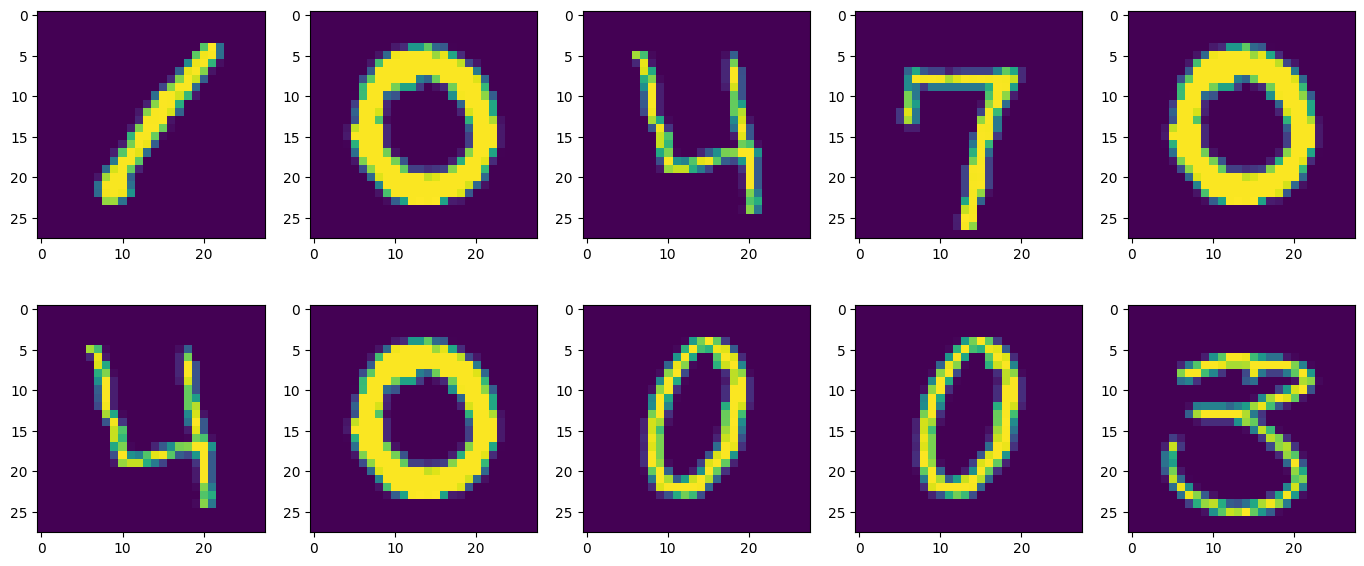

In [10]:
from matplotlib import pyplot as plt

#Subplots.
fig, axs = plt.subplots(nrows=2, ncols=5)
# Set figure dimensions.
fig.set_figwidth(17)
fig.set_figheight(7)
# Iterate axes.
for ax in axs.reshape(-1):
    # Show random image from training set.
    index = np.random.randint(0, 9)
    ax.imshow(x[index])

x

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import LearningRateScheduler

In [12]:
y=train_ds["label"].values

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation=relu),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation=relu),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation=relu),
    Flatten(),
    Dense(units=64, activation=relu),
    Dense(units=10, activation=linear)
])

In [14]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=AdamW(),
    metrics=["accuracy"]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          16448     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [17]:
# Using this to avoid useless epoch
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 3: lr *= 0.1
    return lr

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=6,
    callbacks=[LearningRateScheduler(lr_schedule)]
)


Epoch 1/6
1050/1050 [==============================] - 9s 8ms/step - loss: 0.1922 - accuracy: 0.9405 - val_loss: 0.0686 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 2/6
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0546 - accuracy: 0.9828 - val_loss: 0.0459 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 3/6
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0460 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 4/6
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0500 - val_accuracy: 0.9821 - lr: 0.0010
Epoch 5/6
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.0270 - val_accuracy: 0.9907 - lr: 1.0000e-04
Epoch 6/6
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0243 - val_accuracy: 0.9917 - lr: 1.0000e-04
